# Оптимизация производственных расходов

**Постановка задачи**
По описанию технологического процесса обработки стали предсказать температуру стали в конце процесса. Эти данные в дальнейшем планируется использовать для оптимизации производственных расходов.

**Описание этапа обработки**

Сталь обработывается порциями около 100 тонн. Расплавленная сталь заливается в ковш и подоревается до нужной температуры графитовыми электродами. После этого проводится отбор проб, химический анализ, коррекция состава за счет добавления сплава из бункера для сыпучих материалов или проволоки. В процессе расплав продувается инерным газом, периодически подогревается электродами и перемешивается. Процесс длится, пока не будет получен необходимый химический состав и оптимальная температура плавки. После этого расплавленная сталь отправляется на следующие этапы обработки.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

**Целевое значение метрики**

Необходимо достигнуть значения MAE < 6.

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Импорт-библиотек-и-выгрузка-данных" data-toc-modified-id="Импорт-библиотек-и-выгрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт библиотек и выгрузка данных</a></span></li><li><span><a href="#Предобработка-и-исследовательский-анализ-данных" data-toc-modified-id="Предобработка-и-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка и исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Температура" data-toc-modified-id="Температура-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Температура</a></span><ul class="toc-item"><li><span><a href="#Ключи-key" data-toc-modified-id="Ключи-key-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Ключи <code>key</code></a></span></li><li><span><a href="#Даты-datetime" data-toc-modified-id="Даты-datetime-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Даты <code>datetime</code></a></span></li><li><span><a href="#Температуры-temp" data-toc-modified-id="Температуры-temp-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Температуры <code>temp</code></a></span></li></ul></li><li><span><a href="#Электроды" data-toc-modified-id="Электроды-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Электроды</a></span><ul class="toc-item"><li><span><a href="#Ключи-key" data-toc-modified-id="Ключи-key-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Ключи <code>key</code></a></span></li><li><span><a href="#Время-нагрева" data-toc-modified-id="Время-нагрева-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Время нагрева</a></span></li><li><span><a href="#Мощность-нагрева" data-toc-modified-id="Мощность-нагрева-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Мощность нагрева</a></span><ul class="toc-item"><li><span><a href="#Активная-мощность" data-toc-modified-id="Активная-мощность-3.2.3.1"><span class="toc-item-num">3.2.3.1&nbsp;&nbsp;</span>Активная мощность</a></span></li><li><span><a href="#Реактивная-мощность" data-toc-modified-id="Реактивная-мощность-3.2.3.2"><span class="toc-item-num">3.2.3.2&nbsp;&nbsp;</span>Реактивная мощность</a></span></li></ul></li><li><span><a href="#Энергия,-пошедшая-на-нагрев" data-toc-modified-id="Энергия,-пошедшая-на-нагрев-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Энергия, пошедшая на нагрев</a></span></li></ul></li><li><span><a href="#Газ" data-toc-modified-id="Газ-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Газ</a></span></li><li><span><a href="#Сыпучие-материалы" data-toc-modified-id="Сыпучие-материалы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сыпучие материалы</a></span></li><li><span><a href="#Проволочные-материалы" data-toc-modified-id="Проволочные-материалы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проволочные материалы</a></span></li><li><span><a href="#Проверка-правильной-последовательности-деятельности" data-toc-modified-id="Проверка-правильной-последовательности-деятельности-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Проверка правильной последовательности деятельности</a></span></li><li><span><a href="#Интервал-времени-между-первым-и-последним-измерением-температуры" data-toc-modified-id="Интервал-времени-между-первым-и-последним-измерением-температуры-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Интервал времени между первым и последним измерением температуры</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Мультиколлинеарность" data-toc-modified-id="Мультиколлинеарность-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Мультиколлинеарность</a></span></li><li><span><a href="#Разбивка-на-тренировочную-и-тестовую-выборки" data-toc-modified-id="Разбивка-на-тренировочную-и-тестовую-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Разбивка на тренировочную и тестовую выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Dummy-regressor-(median)" data-toc-modified-id="Dummy-regressor-(median)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dummy regressor (median)</a></span></li><li><span><a href="#Линейная-регресия" data-toc-modified-id="Линейная-регресия-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Линейная регресия</a></span><ul class="toc-item"><li><span><a href="#Значимость-признаков" data-toc-modified-id="Значимость-признаков-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Значимость признаков</a></span></li><li><span><a href="#Анализ-ошибок" data-toc-modified-id="Анализ-ошибок-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Анализ ошибок</a></span></li></ul></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>CatBoost</a></span><ul class="toc-item"><li><span><a href="#Значимость-признаков" data-toc-modified-id="Значимость-признаков-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Значимость признаков</a></span></li><li><span><a href="#Анализ-ошибок" data-toc-modified-id="Анализ-ошибок-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Анализ ошибок</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Отчет-по-решению" data-toc-modified-id="Отчет-по-решению-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Отчет по решению</a></span></li></ul></div>

## План работы

1. Выгрузить данные, провести предобработку и исследовательский анализ данных. Разобраться с вопросами, возникшими в процессе знакомства с данными.
2. Подготовить признаки. Мы предполагаем, что важными признаками будут начальная температура, суммарное количество тепла, переданное сплаву (с момента измерения начальной температуры), суммарное количество потраченного газа, сыпучих и проволочных материалов, суммарное время от первого измерения температуры до последнего.
3. Разделить датасет на учебную и тестовую выборки. Провести масштабирование признаков и проверить мультиколлинеарность. 
4. На учебной части выборки обучим линейную регрессию и градиентный бустинг (CatBoost), проанализируем значимость признаков, подберем гиперпараметры.

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Импорт библиотек и выгрузка данных

In [1]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 988 kB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from catboost import Pool, CatBoostRegressor, cv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [3]:
df_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
df_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
df_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
df_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
df_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
df_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
df_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Предобработка и исследовательский анализ данных

Подготовим функции для анализа количественных переменных: *get_boxplot_borders*, которая будет рассчитывать границы ящика с усами, и *boxplot_and_hist*, которая будет строить ящик с усами и гистограмму.

In [4]:
def get_boxplot_borders(data, feature, iqr_koef=1.5):
    """
    input:
    data - DataFrame
    feature - string, название столбца, для которого считаем границы
    iqr_koef=1.5 - float, размах "усов"
    
    output:
    [low_border, hi_border] - list, из двух float элементов, нижней и верхней границы "усов"
    
    Описание:
    Функция считает и возвращает границы ящика с усами: нижняя граница считается как максимум 
    от (q1 - iqr_koef * iqr, минимальный элемент в выборке), верхняя граница считается как 
    минимум от (q3 + iqr_koef * iqr, максимальный элемент в выборке)
    """
    
    data_describe = data[feature].describe()
    q1 = data_describe[4]
    q3 = data_describe[6]
    iqr = q3 - q1
    low_border = max(q1 - iqr_koef * iqr, data_describe[3])
    hi_border = min(q3 + iqr_koef * iqr, data_describe[7])
    return [low_border, hi_border]

def boxplot_and_hist(data, feature, hist_binwidth=10, xlabel=None, title='', iqr_koef=1.5):
    """
    input:
    data - DataFrame
    feature - string, название столбца, для которого считаем границы
    hist_binwidth=10 - number, размер бинов, параметр, передаваемый в sns.histplot
    xlabel='' - string, подпись оси х
    title='' - string, название графика
    iqr_koef=1.5 - float, размах "усов"
    
    output:
    -
    
    Описание:
    Функция строит sns.boxplot и sns.histplot на общих осях для данных из data[feature].
    Внутри вызывается функция get_boxplot_borders для расчета границ ящика с усами.
    """
            
    if xlabel == None:
        xlabel = feature

    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True) 
    
    try:
        low_border, hi_border = get_boxplot_borders(data, feature, iqr_koef)
        low_border, hi_border = round(low_border, 2), round(hi_border, 2)
        boxplot_title = f'Boxplot whiskers: {low_border} - {hi_border}'
    except:
        boxplot_title=None
        
    sns.boxplot(ax=axs[0], data=data, x=feature).set(xlabel=None, title=boxplot_title)
    
    sns.histplot(ax=axs[1], data=data, x=feature, binwidth=hist_binwidth)
    plt.ylabel(None)
    plt.xlabel(xlabel)
    plt.suptitle(title)
    plt.show()
    
    try:
        display(pd.DataFrame(data[feature].describe()).T)
    except:
        print(pd.DataFrame(data[feature].describe()).T)

Функции для отсева данных в датафреймах. Передаем в *update_all_df* список ключей, которые нужно оставить (good_keys) и/или список ключей, которые нужно исключить (bad_keys) из всех датафреймов.

In [5]:
def key_selection(df, good_keys=None, bad_keys=None):
    if bad_keys is None:
        bad_keys = []
    if good_keys is None:
        return df.query('key not in @bad_keys')
    else:
        return df.query('key in @good_keys and key not in @bad_keys')

def update_all_df(good_keys=None, bad_keys=None):
    global df_temp, df_arc, df_bulk, df_bulk_time, df_gas, df_wire, df_wire_time
    df_temp = key_selection(df_temp, good_keys, bad_keys)
    df_arc = key_selection(df_arc, good_keys, bad_keys)
    df_bulk = key_selection(df_bulk, good_keys, bad_keys) 
    df_bulk_time = key_selection(df_bulk_time, good_keys, bad_keys) 
    df_gas = key_selection(df_gas, good_keys, bad_keys)
    df_wire = key_selection(df_wire, good_keys, bad_keys)
    df_wire_time = key_selection(df_wire_time, good_keys, bad_keys)
    display(f'В df_temp осталось {df_temp["key"].nunique()} уникальных ключей')

### Температура 

In [6]:
df_temp.info()
df_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Видим, что у столбца `Время замера` нужно поменять тип. Также переименуем столбцы.

In [7]:
df_temp.columns = ['key', 'datetime', 'temp']
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'])
df_temp.info()
df_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key         15907 non-null int64
datetime    15907 non-null datetime64[ns]
temp        13006 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


,key,datetime,temp
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Видим, что есть пропуски в `temp`. Посмотрим на каждый столбец отдельно.

#### Ключи `key`

In [8]:
df_temp['key'].describe()

count    15907.000000
mean      1607.880870
std        942.212073
min          1.000000
25%        790.000000
50%       1618.000000
75%       2427.000000
max       3241.000000
Name: key, dtype: float64

44      16
1214    16
1513    16
46      16
1689    15
        ..
1106     2
1424     2
3156     2
279      1
195      1
Name: key, Length: 3216, dtype: int64

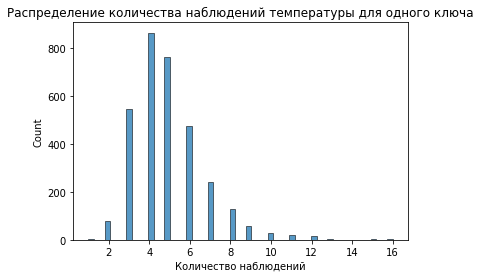

In [9]:
display(df_temp['key'].value_counts())
sns.histplot(df_temp['key'].value_counts())
plt.title('Распределение количества наблюдений температуры для одного ключа')
plt.xlabel('Количество наблюдений')
plt.show()

* Видим, что у нас 3216 уникальных ключей. При этом нумерация идет от 1 до 3241, то есть нумерация не сквозная, есть 25 пропущенных значений ключа. 
* Количество наблюдений для одного ключа варьируется от 1 до 16. Для большинства ключей доступно 5 наблюдений температуры.
* Ключи, для которых имеем только одно наблюдение пометим как плохие: мне рассчитываем, что нам известны как минимум две температуры: на входе и на выходе.

In [10]:
bad_keys = [195, 279]

#### Даты `datetime`

In [11]:
df_temp['datetime'].describe()

count                   15907
unique                  15907
top       2019-08-28 20:36:18
freq                        1
first     2019-05-03 11:16:18
last      2019-09-01 04:38:08
Name: datetime, dtype: object

Видим, что нам доступны данные начиная с 3 марта по 1 сентября 2019 года, это 182 дня. Все записи уникальны. Посмотрим на распределение по датам. 

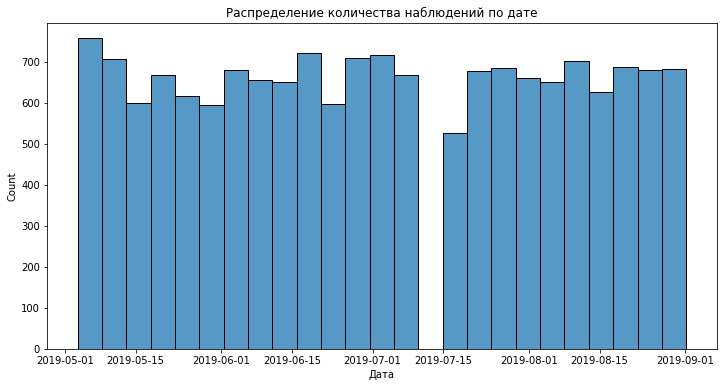

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df_temp['datetime'])
plt.title('Распределение количества наблюдений по дате')
plt.xlabel('Дата')
plt.show()

Видим пропуск данных во второй четверти июля.

In [13]:
df_temp['date'] = df_temp['datetime'].dt.date
df_temp['date'].describe()

count          15907
unique           119
top       2019-05-05
freq             184
Name: date, dtype: object

Видим 119 дат, в которые есть наблюдений. Максимальное количество наблюдений в один день - 184. Посмотрим нет ли пиков по часами, минутам, секундах.

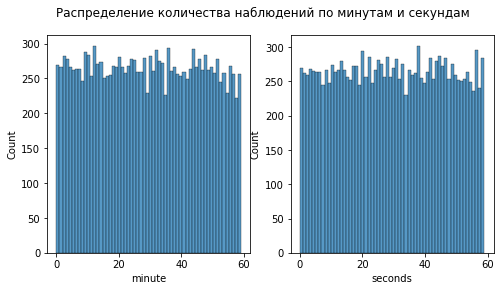

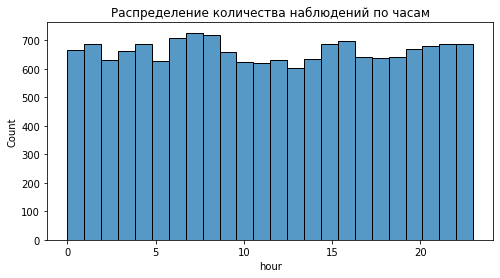

,count,mean,std,min,25%,50%,75%,max
hour,24.0,662.791667,33.541641,602.0,634.00,664.0,686.0,726.0
minute,60.0,265.116667,15.818988,222.0,257.75,266.0,276.5,297.0
seconds,60.0,265.116667,15.106505,230.0,253.75,264.0,275.0,302.0


In [14]:
df_temp['hour'] = df_temp['datetime'].dt.hour
df_temp['minute'] = df_temp['datetime'].dt.minute
df_temp['seconds'] = df_temp['datetime'].dt.second

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(df_temp['minute'], ax=axes[0], bins=60)
sns.histplot(df_temp['seconds'], ax=axes[1], bins=60)
plt.suptitle('Распределение количества наблюдений по минутам и секундам')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df_temp['hour'], bins=24)
plt.title('Распределение количества наблюдений по часам')
plt.show()

df_temp_describe = pd.DataFrame()
for column in ['hour', 'minute', 'seconds']:
    df_temp_describe[column] = df_temp[column].value_counts().describe()
df_temp_describe.T

Какой-то заметной структуры не видим, удалим ненужные столбцы.

In [15]:
df_temp = df_temp.drop(columns=['date', 'hour', 'minute', 'seconds'])
df_temp.columns

Index(['key', 'datetime', 'temp'], dtype='object')

#### Температуры `temp`

Посмотрим на наш целевой признак. 

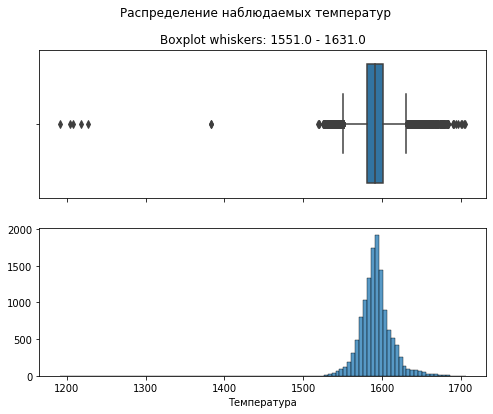

,count,mean,std,min,25%,50%,75%,max
temp,13006.0,1591.84092,21.375851,1191.0,1581.0,1591.0,1601.0,1705.0


In [16]:
boxplot_and_hist(df_temp, 'temp', 5, xlabel='Температура', 
                 title='Распределение наблюдаемых температур')

Видим, что данные группируются около 1600 градусов. Что интересно, медиана и среднее отличаются мало. Есть выбросы по температуре в обе стороны, но в сторону маленьких температур хвост заметно больше. 

Очевидными выбросами являются данные со значением меньше 1400. Добавим номера ключей, содержащих эти данные в список плохих.

In [17]:
bad_keys += list(df_temp.query('temp < 1400')['key'])
print('Проблемные партии:', *bad_keys)

Проблемные партии: 195 279 867 1214 1619 1818 1818 2052 2561


Как мы и обращали внимание раньше, есть пропуски, на них посмотрим отдельно.

In [18]:
nan_temp_keys = df_temp[df_temp['temp'].isna()]['key'].unique()
display(f'Количество ключей с пропусками {len(nan_temp_keys)}')
display(nan_temp_keys)

'Количество ключей с пропусками 739'

array([2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510,
       2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521,
       2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532,
       2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543,
       2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554,
       2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565,
       2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576,
       2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587,
       2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598,
       2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609,
       2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620,
       2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631,
       2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642,
       2643, 2644, 2645, 2646, 2647, 2648, 2649, 26

Из 3200 уникальных ключей у 739 есть пропуски в данных о температуре. Это еще дополнительно урезает наш датасет. Посмотрим полностью ли отсутствует информация о температуре или это отдельные пропуске, но, например, начальная и конечная температуры доступны.

In [19]:
df_temp.query('key in @nan_temp_keys and temp.notna()')

,key,datetime,temp
12267,2500,2019-08-06 03:11:31,1539.0
12271,2501,2019-08-06 03:44:42,1587.0
12276,2502,2019-08-06 04:45:26,1583.0
12283,2503,2019-08-06 05:32:06,1603.0
12287,2504,2019-08-06 06:35:39,1583.0
...,...,...,...
15878,3237,2019-08-31 22:44:04,1569.0
15883,3238,2019-08-31 23:30:31,1584.0
15886,3239,2019-09-01 01:31:47,1598.0
15894,3240,2019-09-01 02:39:01,1617.0


In [20]:
for key in nan_temp_keys:
    print(key, list(df_temp[df_temp['key'] == key]['temp']))

2500 [1539.0, nan, nan, nan]
2501 [1587.0, nan, nan, nan, nan]
2502 [1583.0, nan, nan, nan, nan, nan, nan]
2503 [1603.0, nan, nan, nan]
2504 [1583.0, nan, nan]
2505 [1606.0, nan, nan, nan, nan]
2506 [1595.0, nan, nan, nan, nan, nan, nan, nan]
2507 [1568.0, nan, nan, nan, nan, nan]
2508 [1586.0, nan, nan, nan, nan, nan, nan]
2509 [1545.0, nan, nan, nan, nan, nan]
2510 [1544.0, nan, nan, nan, nan, nan]
2511 [1557.0, nan, nan, nan, nan, nan, nan]
2512 [1574.0, nan, nan]
2513 [1555.0, nan, nan, nan]
2514 [1572.0, nan, nan, nan, nan, nan]
2515 [1574.0, nan, nan, nan, nan]
2516 [1558.0, nan, nan, nan]
2517 [1578.0, nan, nan, nan, nan, nan, nan, nan]
2518 [1563.0, nan, nan, nan]
2519 [1569.0, nan, nan, nan]
2520 [1605.0, nan, nan, nan, nan]
2521 [1565.0, nan, nan]
2522 [1592.0, nan, nan]
2523 [1595.0, nan, nan, nan]
2524 [1597.0, nan, nan, nan, nan, nan]
2525 [1582.0, nan, nan, nan, nan, nan, nan, nan]
2526 [1593.0, nan, nan, nan, nan, nan, nan]
2527 [1587.0, nan, nan]
2528 [1642.0, nan, nan,

Да, похоже, что для этих 739 партий есть только начальная температура, то есть отсутствует целевой признак. Возникает вопрос, не является ли этот кусок данных тестовыми? 739 - это чуть больше 20% от доступных нам данных.

Создадим список хороших партий, для которых нам доступно значение целевого признака. И уберем из датафреймов плохие данные.

In [21]:
good_keys = df_temp.query('key not in @nan_temp_keys and key not in @bad_keys')['key'].unique()
display(f'Количество хороших партий: {len(good_keys)}')

'Количество хороших партий: 2470'

In [22]:
update_all_df(good_keys=good_keys)

'В df_temp осталось 2470 уникальных ключей'

Видим, что отсев получился, двигаемся дальше.

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Электроды

In [23]:
df_arc.info()
df_arc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11427 entries, 0 to 11448
Data columns (total 5 columns):
key                     11427 non-null int64
Начало нагрева дугой    11427 non-null object
Конец нагрева дугой     11427 non-null object
Активная мощность       11427 non-null float64
Реактивная мощность     11427 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 535.6+ KB


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Из физических соображений понятно, что нас не интересует реактивная мощность, т.к. она не идет на нагрев металла. При этом обращаем внимание на то, что она как-будто ведет себя скоррелированно с активной мощностью. Позже проверим так ли это.

По большому счету нас интересует суммарное тепло переданное металлу, которое равно активной мощности на время горения дуги. Переименуем колонки, приведем колонки с датой-временем к подходящему типу и посмотрим на предоставленные нам данные.

In [24]:
df_arc.columns = ['key', 'start_time', 'finish_time', 'active_power', 'reactive_power']
df_arc['start_time'] = pd.to_datetime(df_arc['start_time'])
df_arc['finish_time'] = pd.to_datetime(df_arc['finish_time'])
df_arc.info()
df_arc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11427 entries, 0 to 11448
Data columns (total 5 columns):
key               11427 non-null int64
start_time        11427 non-null datetime64[ns]
finish_time       11427 non-null datetime64[ns]
active_power      11427 non-null float64
reactive_power    11427 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 535.6 KB


,key,start_time,finish_time,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


#### Ключи `key`

In [25]:
df_arc['key'].describe()

count    11427.000000
mean      1241.702459
std        719.259542
min          1.000000
25%        621.500000
50%       1245.000000
75%       1870.000000
max       2499.000000
Name: key, dtype: float64

2108    16
1513    15
1689    15
46      13
322     13
        ..
1988     1
1974     1
112      1
343      1
269      1
Name: key, Length: 2470, dtype: int64

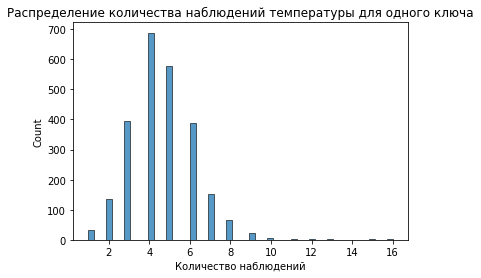

In [26]:
display(df_arc['key'].value_counts())
sns.histplot(df_arc['key'].value_counts())
plt.title('Распределение количества наблюдений температуры для одного ключа')
plt.xlabel('Количество наблюдений')
plt.show()

* Видим, что у нас 3214 уникальных ключей. При этом нумерация идет от 1 до 3241, то есть нумерация не сквозная, есть 27 пропущенных значений ключа. 
* Количество наблюдений для одного ключа варьируется от 1 до 16. Для большинства ключей доступно 4-5 наблюдений.

In [27]:
df_arc.isna().sum()

key               0
start_time        0
finish_time       0
active_power      0
reactive_power    0
dtype: int64

Пропусков не видим. Посмотрим совпадает ли общее количество ключей с количеством хороших ключей.

In [28]:
df_arc.query('key in @good_keys')['key'].nunique()

2470

Совпадает, это значит, что каждая партия подвергалась нагреву.

#### Время нагрева

Cоздадим колонку, в которой будет храниться продолжительность нагрева.

In [29]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11427 entries, 0 to 11448
Data columns (total 5 columns):
key               11427 non-null int64
start_time        11427 non-null datetime64[ns]
finish_time       11427 non-null datetime64[ns]
active_power      11427 non-null float64
reactive_power    11427 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 535.6 KB


In [30]:
df_arc['heating_time_sec'] = (df_arc['finish_time'] - df_arc['start_time']).dt.total_seconds()
df_arc.head()

,key,start_time,finish_time,active_power,reactive_power,heating_time_sec
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0


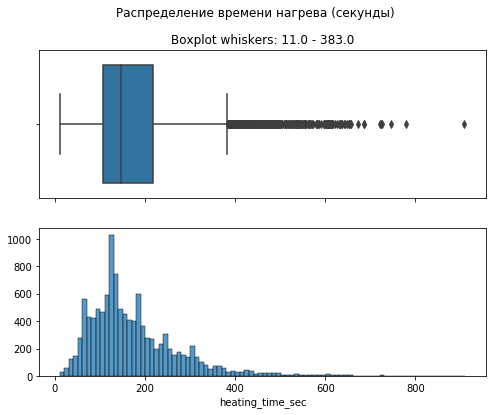

,count,mean,std,min,25%,50%,75%,max
heating_time_sec,11427.0,172.932528,98.528374,11.0,108.0,147.0,218.0,907.0


In [31]:
boxplot_and_hist(df_arc, 'heating_time_sec', 10, 
                 title='Распределение времени нагрева (секунды)')

Видим большие, но не зашкаливающие значения. Посмотрим на большие значения.

In [32]:
df_arc[df_arc['heating_time_sec'] > 650].sort_values(by='heating_time_sec', ascending=False)

,key,start_time,finish_time,active_power,reactive_power,heating_time_sec
7799,1689,2019-07-02 18:49:03,2019-07-02 19:04:10,3.731596,2.676388,907.0
7433,1616,2019-06-30 09:07:06,2019-06-30 09:20:06,2.943082,1.998065,780.0
2939,640,2019-05-27 01:25:40,2019-05-27 01:38:06,2.766592,2.236813,746.0
4654,1005,2019-06-09 05:59:14,2019-06-09 06:11:19,2.975003,2.006356,725.0
2661,580,2019-05-24 18:06:25,2019-05-24 18:18:29,2.940772,2.211983,724.0
9226,2001,2019-07-19 20:19:15,2019-07-19 20:31:16,3.156276,2.504206,721.0
1439,312,2019-05-15 00:00:26,2019-05-15 00:11:51,2.543666,2.018395,685.0
10975,2387,2019-08-02 06:27:55,2019-08-02 06:39:20,2.999812,2.197359,685.0
2027,437,2019-05-19 12:56:06,2019-05-19 13:07:18,2.661747,2.025214,672.0
7800,1689,2019-07-02 19:57:33,2019-07-02 20:08:31,2.864100,2.150657,658.0


Пока не будем с ними ничего делать. Вернемся к этому вопросу, если качество обученной модели будет низким.

#### Мощность нагрева

##### Активная мощность

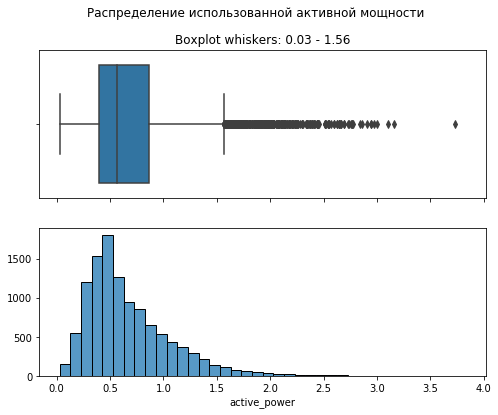

,count,mean,std,min,25%,50%,75%,max
active_power,11427.0,0.676102,0.408159,0.030002,0.398397,0.561742,0.864483,3.731596


In [33]:
boxplot_and_hist(df_arc, 'active_power', 0.1, 
                 title='Распределение использованной активной мощности')

Посмотрим на большие значения

In [34]:
df_arc[df_arc['active_power'] > 3].sort_values(by='active_power', ascending=False)

,key,start_time,finish_time,active_power,reactive_power,heating_time_sec
7799,1689,2019-07-02 18:49:03,2019-07-02 19:04:10,3.731596,2.676388,907.0
9226,2001,2019-07-19 20:19:15,2019-07-19 20:31:16,3.156276,2.504206,721.0
9870,2139,2019-07-24 17:01:13,2019-07-24 17:12:06,3.107820,1.946782,653.0


Интересно. Большой мощности соответсвует большое время нагрева. Посмотроим зависимость одного от другого

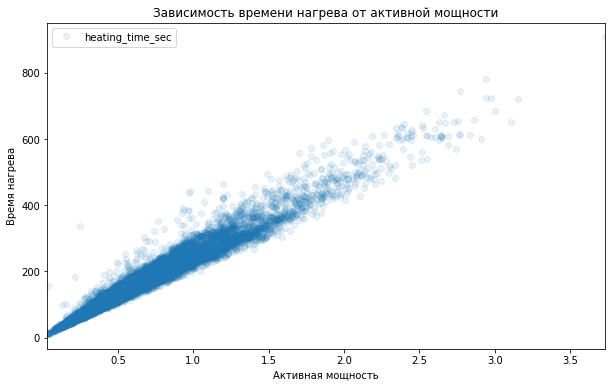

In [35]:
df_arc.plot(x='active_power', y='heating_time_sec', style='o', alpha=0.1, figsize=(10, 6),
           title='Зависимость времени нагрева от активной мощности')
plt.xlabel('Активная мощность')
plt.ylabel('Время нагрева')
plt.show()

Странно. Нужно учтонить нет ли ошибки в данных: выглядит так, будто под названием активная мощность нам дана переданная металлу теплота.

Удалим ключи, в которых встречаются большие значения времени нагрева (> 600) и мощности (> 2.5).

In [36]:
df_temp["key"].nunique()

2470

In [37]:
bad_keys = df_arc.query('active_power > 2.5 or heating_time_sec > 500')['key'].unique()
frac = round(len(bad_keys) / df_temp["key"].nunique(), 2)
display(f'''Количество ключей к удалению {len(bad_keys)}, доля от общего количества {frac}''')

'Количество ключей к удалению 115, доля от общего количества 0.05'

In [38]:
update_all_df(bad_keys=bad_keys)

'В df_temp осталось 2355 уникальных ключей'

##### Реактивная мощность

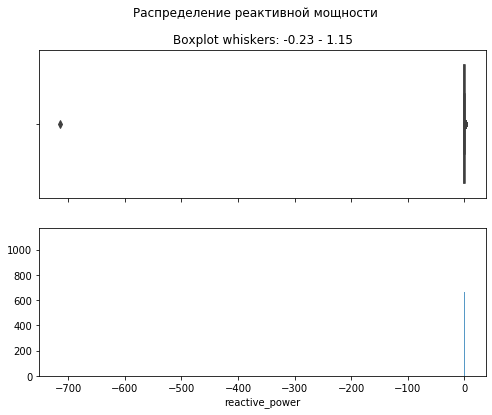

,count,mean,std,min,25%,50%,75%,max
reactive_power,10789.0,0.425137,6.899005,-715.504924,0.290299,0.415227,0.635828,2.100782


In [39]:
boxplot_and_hist(df_arc, 'reactive_power', 0.05, 
                 title='Распределение реактивной мощности')

Видим выброс в районе -700. Посмотрим на распределение без него.

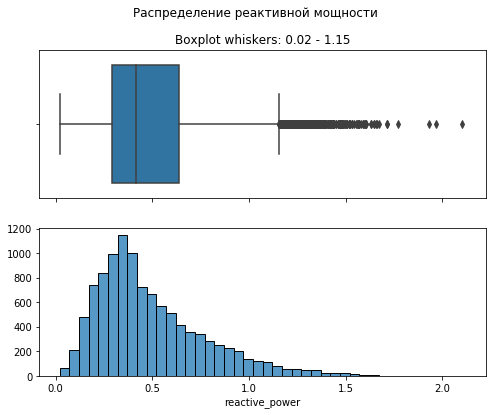

,count,mean,std,min,25%,50%,75%,max
reactive_power,10788.0,0.4915,0.2832,0.020806,0.290305,0.415241,0.635849,2.100782


In [40]:
boxplot_and_hist(df_arc[df_arc['reactive_power'] > -100], 'reactive_power', 0.05, 
                 title='Распределение реактивной мощности')

Удалим из выборки ключ, который относится к выборосу.

In [41]:
update_all_df(bad_keys=list(df_arc[df_arc['reactive_power'] < 0]['key']))

'В df_temp осталось 2354 уникальных ключей'

Посмотрим, насколько сильно связаны значения активной и реактивной мощности.

In [42]:
df_arc[['active_power', 'reactive_power']].corr()

,active_power,reactive_power
active_power,1.000000,0.957789
reactive_power,0.957789,1.000000


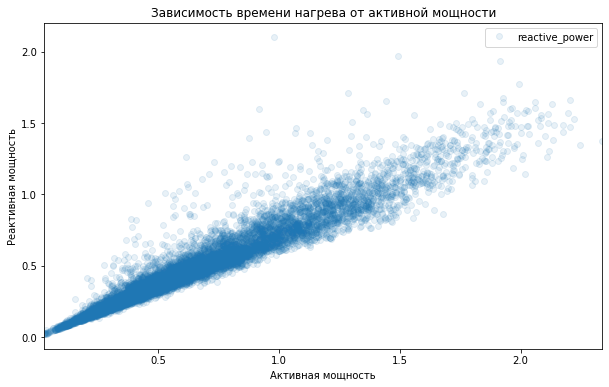

In [43]:
df_arc.plot(x='active_power', y='reactive_power', style='o', alpha=0.1, figsize=(10, 6),
           title='Зависимость времени нагрева от активной мощности')
plt.xlabel('Активная мощность')
plt.ylabel('Реактивная мощность')
plt.show()

Видим, что они практически пропорциональных. Очевидно, что мы не будем использовать реактивную мощность в качестве одного из признаков.

#### Энергия, пошедшая на нагрев

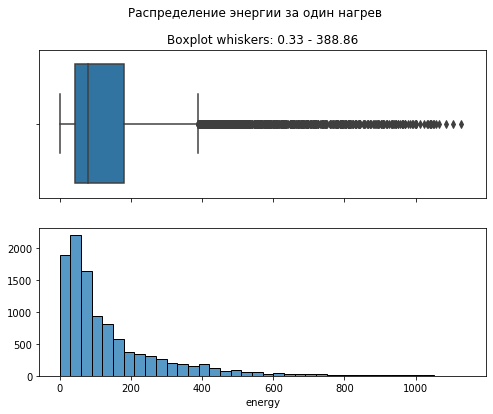

,count,mean,std,min,25%,50%,75%,max
energy,10785.0,143.350208,160.141391,0.330021,43.338959,80.596596,181.548236,1128.795362


In [44]:
df_arc['energy'] = df_arc['active_power'] * df_arc['heating_time_sec']
boxplot_and_hist(df_arc, 'energy', 30, 
                 title='Распределение энергии за один нагрев')

Видим длинный хвост, но не будем его обрезать.

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Газ

In [45]:
df_gas.info()
df_gas.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2496
Data columns (total 2 columns):
key      2352 non-null int64
Газ 1    2352 non-null float64
dtypes: float64(1), int64(1)
memory usage: 55.1 KB


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [46]:
df_gas.columns = ['key', 'gas_quantity']

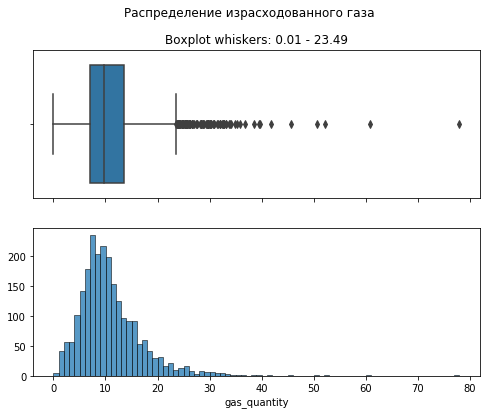

,count,mean,std,min,25%,50%,75%,max
gas_quantity,2352.0,10.927271,6.206585,0.008399,7.036521,9.80211,13.618254,77.99504


In [47]:
boxplot_and_hist(df_gas, 'gas_quantity', 1, 
                 title='Распределение израсходованного газа')

Удалим сильно выбивающиеся значения (> 35).

In [48]:
bad_keys = df_gas.query('gas_quantity > 35')['key'].unique()
update_all_df(bad_keys=bad_keys)

'В df_temp осталось 2342 уникальных ключей'

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Сыпучие материалы

In [49]:
df_bulk.info()
df_bulk.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2407
Data columns (total 16 columns):
key        2278 non-null int64
Bulk 1     181 non-null float64
Bulk 2     9 non-null float64
Bulk 3     913 non-null float64
Bulk 4     772 non-null float64
Bulk 5     49 non-null float64
Bulk 6     413 non-null float64
Bulk 7     11 non-null float64
Bulk 8     1 non-null float64
Bulk 9     12 non-null float64
Bulk 10    136 non-null float64
Bulk 11    115 non-null float64
Bulk 12    1764 non-null float64
Bulk 13    11 non-null float64
Bulk 14    2018 non-null float64
Bulk 15    1609 non-null float64
dtypes: float64(15), int64(1)
memory usage: 302.5 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Исходим из предположения, что для нас важна информация о суммарном количестве добавок,  но неважна информация о порциях и времени их добавления. Посчитаем суммарное количество сыпучих материалов.

In [50]:
bulk_list = list(df_bulk.columns)
bulk_list.remove('key')
print(bulk_list)

['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']


In [51]:
df_bulk['sum_bulk'] = df_bulk[bulk_list].sum(axis=1)
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,sum_bulk
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0,553.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0,582.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0,544.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0,595.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0,584.0


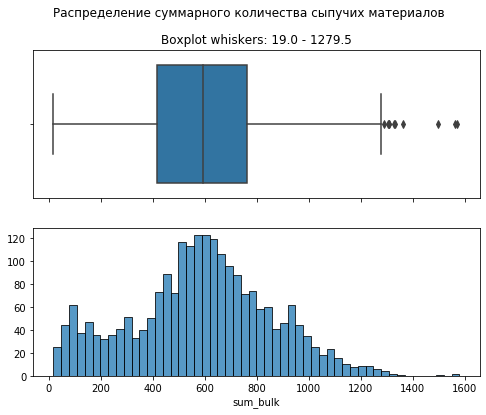

,count,mean,std,min,25%,50%,75%,max
sum_bulk,2278.0,587.073749,272.963947,19.0,418.25,594.0,762.75,1569.0


In [52]:
boxplot_and_hist(df_bulk, 'sum_bulk', 30, 
                 title='Распределение суммарного количества сыпучих материалов')

Удалим ключи, которым соответсвуют выбросы

In [53]:
bad_keys = df_bulk.query('sum_bulk > 1400')['key'].unique()
update_all_df(bad_keys=bad_keys)

'В df_temp осталось 2339 уникальных ключей'

In [54]:
df_bulk_time.info()
df_bulk_time.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2407
Data columns (total 16 columns):
key        2275 non-null int64
Bulk 1     179 non-null object
Bulk 2     9 non-null object
Bulk 3     912 non-null object
Bulk 4     771 non-null object
Bulk 5     49 non-null object
Bulk 6     412 non-null object
Bulk 7     11 non-null object
Bulk 8     1 non-null object
Bulk 9     12 non-null object
Bulk 10    136 non-null object
Bulk 11    115 non-null object
Bulk 12    1761 non-null object
Bulk 13    11 non-null object
Bulk 14    2015 non-null object
Bulk 15    1606 non-null object
dtypes: int64(1), object(15)
memory usage: 302.1+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


Исправим тип данных.

In [55]:
for bulk in bulk_list:
    df_bulk_time[bulk] = pd.to_datetime(df_bulk_time[bulk])
df_bulk_time.info()
df_bulk_time.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2407
Data columns (total 16 columns):
key        2275 non-null int64
Bulk 1     179 non-null datetime64[ns]
Bulk 2     9 non-null datetime64[ns]
Bulk 3     912 non-null datetime64[ns]
Bulk 4     771 non-null datetime64[ns]
Bulk 5     49 non-null datetime64[ns]
Bulk 6     412 non-null datetime64[ns]
Bulk 7     11 non-null datetime64[ns]
Bulk 8     1 non-null datetime64[ns]
Bulk 9     12 non-null datetime64[ns]
Bulk 10    136 non-null datetime64[ns]
Bulk 11    115 non-null datetime64[ns]
Bulk 12    1761 non-null datetime64[ns]
Bulk 13    11 non-null datetime64[ns]
Bulk 14    2015 non-null datetime64[ns]
Bulk 15    1606 non-null datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 302.1 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56


<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Проволочные материалы

In [56]:
df_wire.info()
df_wire.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248 entries, 0 to 2372
Data columns (total 10 columns):
key       2248 non-null int64
Wire 1    2228 non-null float64
Wire 2    798 non-null float64
Wire 3    35 non-null float64
Wire 4    9 non-null float64
Wire 5    0 non-null float64
Wire 6    40 non-null float64
Wire 7    2 non-null float64
Wire 8    12 non-null float64
Wire 9    27 non-null float64
dtypes: float64(9), int64(1)
memory usage: 193.2 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Исходим из предположения, что для нас важна информация о суммарном количестве добавок, но неважна информация о порциях и времени их добавления. Посчитаем суммарное количество проволочных материалов

In [57]:
wire_list = list(df_wire.columns)
wire_list.remove('key')
print(wire_list)

['Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']


In [58]:
df_wire['sum_wire'] = df_wire[wire_list].sum(axis=1)
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,sum_wire
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.059998
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.052315
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.160157
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.063515
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.352796


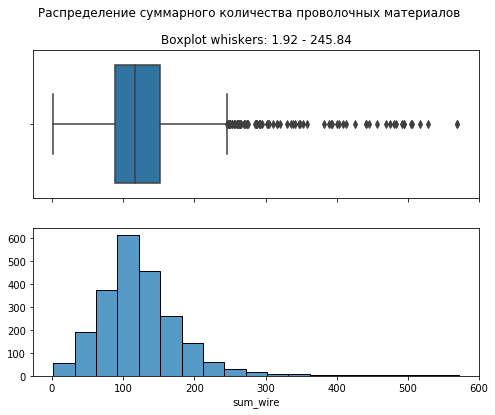

,count,mean,std,min,25%,50%,75%,max
sum_wire,2248.0,125.225967,64.32308,1.9188,88.341499,116.08012,151.340284,568.777664


In [59]:
boxplot_and_hist(df_wire, 'sum_wire', 30, 
                 title='Распределение суммарного количества проволочных материалов')

Удалим ключи, которым соответсвуют выбросы.

In [60]:
bad_keys = df_wire.query('sum_wire > 370')['key'].unique()
update_all_df(bad_keys=bad_keys)

'В df_temp осталось 2313 уникальных ключей'

In [61]:
df_wire_time.info()
df_wire_time.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222 entries, 0 to 2372
Data columns (total 10 columns):
key       2222 non-null int64
Wire 1    2202 non-null object
Wire 2    777 non-null object
Wire 3    13 non-null object
Wire 4    9 non-null object
Wire 5    0 non-null object
Wire 6    37 non-null object
Wire 7    2 non-null object
Wire 8    12 non-null object
Wire 9    26 non-null object
dtypes: int64(1), object(9)
memory usage: 191.0+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Исправим тип данных.

In [62]:
for wire in wire_list:
    df_wire_time[wire] = pd.to_datetime(df_wire_time[wire])
df_wire_time.info()
df_wire_time.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2222 entries, 0 to 2372
Data columns (total 10 columns):
key       2222 non-null int64
Wire 1    2202 non-null datetime64[ns]
Wire 2    777 non-null datetime64[ns]
Wire 3    13 non-null datetime64[ns]
Wire 4    9 non-null datetime64[ns]
Wire 5    0 non-null datetime64[ns]
Wire 6    37 non-null datetime64[ns]
Wire 7    2 non-null datetime64[ns]
Wire 8    12 non-null datetime64[ns]
Wire 9    26 non-null datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 191.0 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT


<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Проверка правильной последовательности деятельности

Еще одна вещь, которую важно проверить: все операции с металлом (нагрев, легирование) происходят между первым и последним измерением температуры. Для этого соберем в датафрейме time_check_df информацию о времени операций, производимых со сплавом.

In [63]:
time_check_df = df_temp.groupby('key')['datetime'].agg(['min', 'max'])
time_check_df.columns = ['first_temp', 'last_temp']
time_check_df.sample(5)

,first_temp,last_temp
key,,
957,2019-06-07 17:45:50,2019-06-07 18:16:45
1672,2019-07-02 01:18:17,2019-07-02 01:34:36
914,2019-06-06 00:53:47,2019-06-06 01:16:04
1787,2019-07-05 19:33:40,2019-07-05 20:09:40
2396,2019-08-02 14:28:59,2019-08-02 14:57:23


In [64]:
time_check_df[['first_heating', 'last_heating']] = df_arc.groupby('key').agg(start=('start_time', 'min'), finish=('finish_time','max'))
time_check_df.sample(5)

,first_temp,last_temp,first_heating,last_heating
key,,,,
2036,2019-07-21 02:58:57,2019-07-21 03:22:02,2019-07-21 02:50:40,2019-07-21 03:11:43
2106,2019-07-23 10:44:51,2019-07-23 12:53:19,2019-07-23 10:33:24,2019-07-23 12:37:33
520,2019-05-22 16:51:31,2019-05-22 17:15:26,2019-05-22 16:38:48,2019-05-22 17:11:25
225,2019-05-11 15:07:01,2019-05-11 15:43:46,2019-05-11 14:59:39,2019-05-11 15:22:10
1287,2019-06-18 17:50:54,2019-06-18 18:13:32,2019-06-18 17:47:58,2019-06-18 18:10:47


In [65]:
time_check_df['first_bulk'] = df_bulk_time.set_index('key')[bulk_list].apply('min', axis=1)
time_check_df['last_bulk'] = df_bulk_time.set_index('key')[bulk_list].apply('max', axis=1)
time_check_df.sample(5)

,first_temp,last_temp,first_heating,last_heating,first_bulk,last_bulk
key,,,,,,
1572,2019-06-29 00:01:08,2019-06-29 00:33:27,2019-06-28 23:57:55,2019-06-29 00:26:42,2019-06-29 00:03:41,2019-06-29 00:03:41
2265,2019-07-28 17:16:17,2019-07-28 17:48:15,2019-07-28 17:07:42,2019-07-28 17:49:03,2019-07-28 17:09:03,2019-07-28 17:21:59
1113,2019-06-12 22:07:33,2019-06-12 22:30:18,2019-06-12 22:04:19,2019-06-12 22:27:12,2019-06-12 22:13:40,2019-06-12 22:13:40
1180,2019-06-15 03:10:41,2019-06-15 03:45:27,2019-06-15 03:06:53,2019-06-15 03:44:32,2019-06-15 03:18:37,2019-06-15 03:24:25
436,2019-05-19 12:05:10,2019-05-19 12:28:10,2019-05-19 12:01:55,2019-05-19 12:08:18,2019-05-19 12:06:41,2019-05-19 12:06:41


In [66]:
time_check_df['first_wire'] = df_wire_time.set_index('key')[wire_list].apply('min', axis=1)
time_check_df['last_wire'] = df_wire_time.set_index('key')[wire_list].apply('max', axis=1)
time_check_df.sample(5)

,first_temp,last_temp,first_heating,last_heating,first_bulk,last_bulk,first_wire,last_wire
key,,,,,,,,
842,2019-06-03 14:02:55,2019-06-03 14:34:22,2019-06-03 13:58:40,2019-06-03 14:30:56,2019-06-03 14:06:35,2019-06-03 14:17:25,2019-06-03 14:16:40,2019-06-03 14:16:40
547,2019-05-23 17:04:47,2019-05-23 17:31:55,2019-05-23 16:50:06,2019-05-23 17:30:47,2019-05-23 16:52:12,2019-05-23 16:57:39,2019-05-23 16:56:29,2019-05-23 16:56:29
1750,2019-07-04 09:28:35,2019-07-04 09:53:16,2019-07-04 09:23:40,2019-07-04 09:52:16,2019-07-04 09:32:57,2019-07-04 09:41:20,2019-07-04 09:40:39,2019-07-04 09:40:39
235,2019-05-12 03:02:12,2019-05-12 03:49:47,2019-05-12 02:58:49,2019-05-12 03:48:46,2019-05-12 03:05:42,2019-05-12 03:17:38,2019-05-12 03:13:25,2019-05-12 03:18:56
2122,2019-07-24 04:27:22,2019-07-24 04:55:20,2019-07-24 04:23:03,2019-07-24 04:34:18,2019-07-24 04:29:13,2019-07-24 04:50:27,2019-07-24 04:35:00,2019-07-24 04:35:00


Запишем условия, которые, как мы надеемся, не будут выполняться для наших данных и посмотрим, какое количество записей им соответствует.

In [67]:
cond1 = 'first_heating < first_temp'
cond2 = 'last_heating > last_temp'
cond3 = 'first_bulk < first_temp'
cond4 = 'last_bulk > last_temp'
cond5 = 'first_wire < first_temp'
cond6 = 'last_wire > last_temp'

In [68]:
for cond in [cond1, cond2, cond3, cond4, cond5, cond6]:
    count = len(time_check_df.query(cond))
    frac = round(count / len(time_check_df), 3)
    print(f'Условие {cond}, количество партий {count}, доля от общего количества {frac}')

Условие first_heating < first_temp, количество партий 2281, доля от общего количества 0.986
Условие last_heating > last_temp, количество партий 120, доля от общего количества 0.052
Условие first_bulk < first_temp, количество партий 383, доля от общего количества 0.166
Условие last_bulk > last_temp, количество партий 8, доля от общего количества 0.003
Условие first_wire < first_temp, количество партий 192, доля от общего количества 0.083
Условие last_wire > last_temp, количество партий 2, доля от общего количества 0.001


Видим проблемы: 
1. В 99% случаев первый нагрев происходит после первого измерения температуры. В постановке задачи сказано, что перед легированием сплав догревается до оптимальной температуры. Видимо, как раз это мы и видим. Проверим, насколько близки первые измеренные температуры.
2. Остальные проблемные ситуации (нагрев и легирование после последнего измерения температуры, а также легирование до первого измерения температуры) мы можем удалить, расценив их как ошибочные по тем или иным причинам. При этом мы потеряем заметную часть данных - около 700 наблюдений или около 30% имеющейся выборки. Можно было бы не учитывать данные до первого измерения температуры и после последнего, однако, эти ситуации противоречат описанию технологического процесса, которое нам было предоставлено и мы не можем быть уверены в корректности этих данных.

Начнем со второй проблемы.

In [69]:
bad_keys = []
for cond in [cond2, cond3, cond4, cond5, cond6]:
    bad_keys += list(time_check_df.query(cond).index)

frac = len(bad_keys) / df_temp['key'].nunique()
display(f'Потеряем {frac} данных')    
update_all_df(bad_keys=bad_keys)

'Потеряем 0.30479896238651105 данных'

'В df_temp осталось 1800 уникальных ключей'

Посмотрим на распределение первой измеренной температуры.

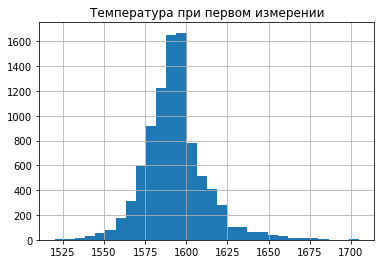

In [70]:
first_temp_measuring = df_temp.groupby('key').agg(first_temp_time=('datetime', 'min'))
first_temp_measuring.join(df_temp.set_index('key'), how='left').hist(bins=30)
plt.title('Температура при первом измерении')
plt.show()

Видим, что первая измеренная температура не слишком стабильна, с учетом точности, которая от нас требуется, мы не можем считать ее постоянной, но можем использовать в качество одного из признаков. В этом случае мы не должны учитывать нагревы, которые происходят до первого измерения температуры. Удалим из данных о нагреве лишние записи.

In [71]:
df_arc = df_arc.join(first_temp_measuring, on='key', how='left')
df_arc.head()

,key,start_time,finish_time,active_power,reactive_power,heating_time_sec,energy,first_temp_time
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043,137.0,60.014678,2019-05-03 11:37:27
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914,338.0,438.188301,2019-05-03 11:37:27
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281,126.0,61.787451,2019-05-03 11:37:27
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874,210.0,173.826041,2019-05-03 11:37:27
22,6,2019-05-03 13:46:51,2019-05-03 13:48:34,0.334140,0.230438,103.0,34.416408,2019-05-03 13:49:24


In [72]:
df_arc = df_arc.drop(df_arc.query('finish_time < first_temp_time').index)
df_arc.head()

,key,start_time,finish_time,active_power,reactive_power,heating_time_sec,energy,first_temp_time
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914,338.0,438.188301,2019-05-03 11:37:27
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281,126.0,61.787451,2019-05-03 11:37:27
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874,210.0,173.826041,2019-05-03 11:37:27
23,6,2019-05-03 13:50:39,2019-05-03 13:57:17,1.653073,1.236721,398.0,657.923237,2019-05-03 13:49:24
24,6,2019-05-03 14:00:00,2019-05-03 14:02:56,0.770170,0.478253,176.0,135.549978,2019-05-03 13:49:24


<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Интервал времени между первым и последним измерением температуры

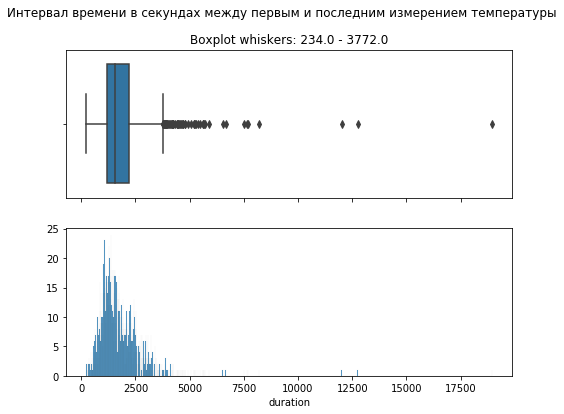

,count,mean,std,min,25%,50%,75%,max
duration,2313.0,1765.955037,987.740836,234.0,1167.0,1559.0,2209.0,18948.0


In [73]:
time_check_df['duration'] = (time_check_df['last_temp'] - time_check_df['first_temp']).dt.total_seconds()
boxplot_and_hist(time_check_df, 'duration', 
                 title='Интервал времени в секундах между первым и последним измерением температуры')

Избавимся от выбросов.

In [74]:
bad_keys = list(time_check_df.query('duration > 3800').index)
update_all_df(bad_keys=bad_keys)

'В df_temp осталось 1744 уникальных ключей'

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Выводы

Была проведена предобработка данных и их исследовательский анализ:
* Мы избавились от тех партий, по которым остуствовали данные о целевом признаке, данные по которым содержали явные выбросы или противоречили описанию технического процесса. В результате размер выборки уменьшился с 3216 партий до 1744. Часть значений можно было бы сохранить после дополнительной консультации с заказчиком по вопросу их корректности.
* Было обнаружено, что до первого измерения температуры в большинстве случае происходит нагрев сплава. Мы приняли решение использовать в качестве признака первую измеренную температуру и удалил лишнюю информацию о нагреве до это этого измерения.
* В качестве признаков будем использовать первую измеренную температуру, суммарное количество добавленных сыпучих и проволочных материалов, суммарное количество использованного газа, суммарное подведенное к газу количество тепла, а также общую продолжительность процесса от первого измерения до последнего. В процессе анализа данных мы увидели, что активная мощность пропорциональна времени нагрева и это выглядит так, будто это переданная газу теплота. Возможно, при передаче данных произошла путаница, поэтому создадим признак равный суммарной активной мощности для каждой партии.
* Если бы нам была доступна более детализированная информация о расходе газа, то можно было бы нагенерировать дополнительных наблюдений из обучающей выборки, используя промежуточные измерения температуры. Это могло бы улучшить качество модели. Стоит уточнить у заказчика доступна ли эта информация.

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Подготовка признаков

In [75]:
df_temp = df_temp.sort_values(by='datetime')

df = df_temp.groupby('key').agg(first_temp=('temp', 'first'))
df = df.join(df_gas.set_index('key'), how='left')
df = df.join(df_bulk[['key', 'sum_bulk']].set_index('key'), how='left')
df = df.join(df_wire[['key', 'sum_wire']].set_index('key'), how='left')

t = df_arc.groupby('key').agg(sum_energy=('energy', 'sum'), sum_power=('active_power', 'sum'))
df = df.join(t, how='left')
df = df.join(time_check_df['duration'], how='left')
df = df.join(df_temp.groupby('key').agg(last_temp=('temp', 'last')), how='left')

df.info()
df.sample()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 2 to 2496
Data columns (total 8 columns):
first_temp      1744 non-null float64
gas_quantity    1742 non-null float64
sum_bulk        1688 non-null float64
sum_wire        1665 non-null float64
sum_energy      1720 non-null float64
sum_power       1720 non-null float64
duration        1744 non-null float64
last_temp       1744 non-null float64
dtypes: float64(8)
memory usage: 202.6 KB


,first_temp,gas_quantity,sum_bulk,sum_wire,sum_energy,sum_power,duration,last_temp
key,,,,,,,,
563,1595.0,20.104933,791.0,140.166,511.13969,2.64053,2418.0,1599.0


In [76]:
df.isna().agg(['sum', 'mean'])

,first_temp,gas_quantity,sum_bulk,sum_wire,sum_energy,sum_power,duration,last_temp
sum,0.0,2.000000,56.00000,79.000000,24.000000,24.000000,0.0,0.0
mean,0.0,0.001147,0.03211,0.045298,0.013761,0.013761,0.0,0.0


Видим, что в данных есть пропуски. Их можно было бы заполнить нулевыми значениями, решив, что отсутствующие значения соответствуют неиспользованию того или иного компонента для партии. Стоит уточнить это у заказчика. Пока же удалим эти партии из рассмотрения.

In [77]:
df = df.dropna()

### Мультиколлинеарность

Посмотрим как обстоят дела с мультиколлинеарностью.

<Figure size 432x288 with 0 Axes>

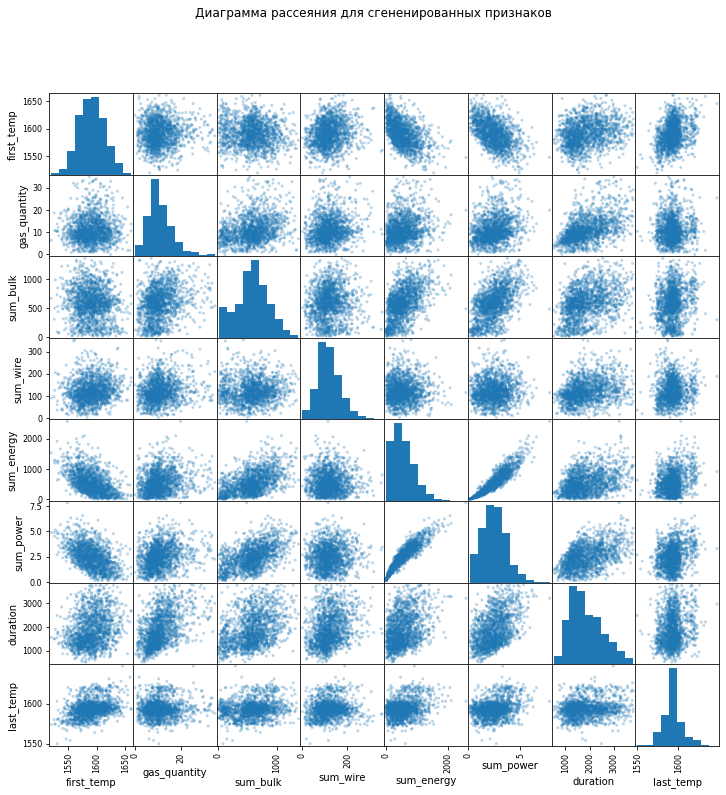

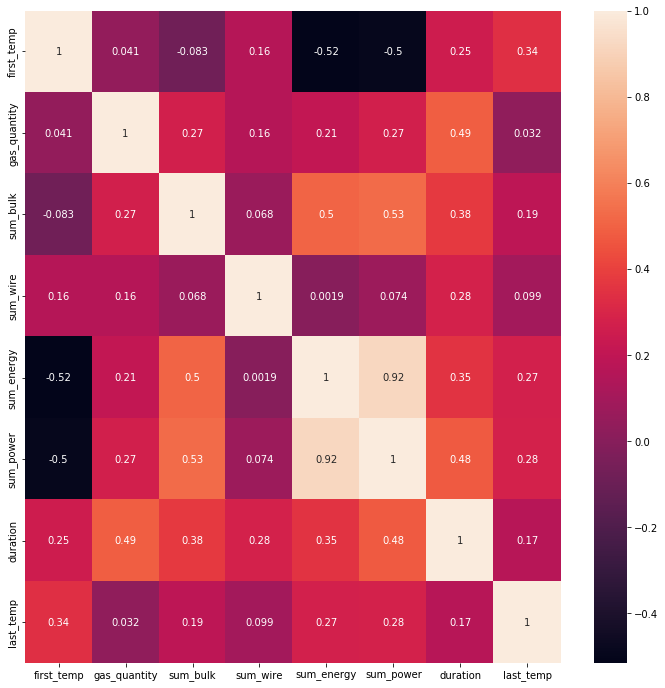

In [78]:
plt.figure()
pd.plotting.scatter_matrix(df, figsize=(12, 12), alpha=0.3)
plt.suptitle('Диаграмма рассеяния для сгененированных признаков')
plt.show()
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Очень высокая корреляция у столбцов `sum_power` и `sum_energy`, как и ожидалось. Более сильная корреляция с целевым признаком у `sum_power`. 

### Разбивка на тренировочную и тестовую выборки

In [79]:
y = df['last_temp']
x = df.drop(columns=['last_temp'])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

x_train.shape[0] + x_test.shape[0] == df.shape[0]

True

### Масштабирование признаков

In [80]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Обучение моделей

In [81]:
result_df = pd.DataFrame(columns=['test_mae'])
result_df

,test_mae


### Dummy regressor (median)

Сначала посмотрим, какое качество даст константная модель. Так как в качестве метрики используем MAE, то для предсказания берем медиану.

In [82]:
model_dummy_median_cv = DummyRegressor(strategy='median')
cv_results_dummy_median= cross_val_score(model_dummy_median_cv, x_train, y_train, 
                scoring='neg_mean_absolute_error', cv=5)
cv_result = abs(round(cv_results_dummy_median.mean(), 2))
display(f'Средний итоговый MAE = {cv_result}')

model_dummy_median = DummyRegressor(strategy='median')
model_dummy_median.fit(x_train, y_train)
y_pred = model_dummy_median.predict(x_test)
test_result = round(mean_absolute_error(y_test, y_pred), 2)
display(f'MAE на тестовой выборке = {test_result}')

'Средний итоговый MAE = 7.55'

'MAE на тестовой выборке = 8.04'

In [83]:
result_df.loc['median', :] = test_result

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Линейная регресия

Из-за мультиколлинеарности мы не можем одновременно использовать признаки `sum_energy` и `sum_power`. Посмотрим какое качество даст линейная регрессия с использованием каждого из признаков.

С использованием признака `sum_energy`:

In [84]:
model_lin_regr_cv = LinearRegression()
cv_results_model_lin_regr = cross_val_score(model_lin_regr_cv, 
                                            x_train.drop(columns='sum_power'), y_train, 
                                            scoring='neg_mean_absolute_error', cv=5)                                            
display(f'Средний итоговый MAE = {abs(round(cv_results_model_lin_regr.mean(), 2))}')

'Средний итоговый MAE = 5.97'

С использованием признака `sum_power`:

In [85]:
model_lin_regr_cv = LinearRegression()
cv_results_model_lin_regr = cross_val_score(model_lin_regr_cv, 
                                            x_train.drop(columns='sum_energy'), y_train, 
                                            scoring='neg_mean_absolute_error', cv=5)
display(f'Средний итоговый MAE = {abs(round(cv_results_model_lin_regr.mean(), 2))}')

'Средний итоговый MAE = 5.44'

Видим, что использование `sum_energy` дает результат чуть лучше. Дальше будем использовать этот признак.

In [86]:
x_train = x_train.drop(columns=['sum_power'])
x_test = x_test.drop(columns=['sum_power'])

#### Значимость признаков

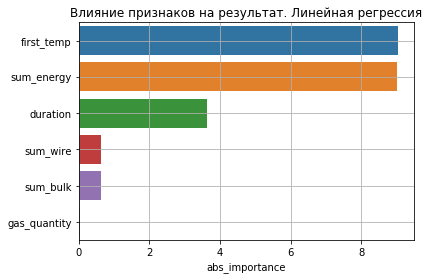

,importance,abs_importance
first_temp,9.021809,9.021809
sum_energy,9.017381,9.017381
duration,-3.639390,3.639390
sum_wire,0.636148,0.636148
sum_bulk,-0.630806,0.630806
gas_quantity,-0.045228,0.045228


In [87]:
model_lin_regr = LinearRegression()
model_lin_regr.fit(x_train, y_train)

coef_table = pd.DataFrame(model_lin_regr.coef_, index=x_train.columns, columns=['importance'])
coef_table['abs_importance'] = abs(coef_table['importance'])

importances = pd.Series(coef_table['abs_importance'], 
                        index=coef_table.index).sort_values(ascending=False)

sns.barplot(y=importances.index, x=importances)
plt.title('Влияние признаков на результат. Линейная регрессия')
plt.grid(True)
plt.show()
coef_table.sort_values(by='abs_importance', ascending=False)

Видим, что наибольший вклад дает начальная температура и суммарное количество подведенной энергии, что ожидаемо. При этом видим, что продолжительность процесса входит в отрицательным коэффициентом - это логично, ведь чем дольше времени занимает процесс легирования, тем сильнее успевает остыть сплав. Неожиданным является то, что у сыпучих и проволочных материалов вклад идет с разным знаком. Нужно разбираться с тем, какие конкретно идут добавки и при каких температурах: возможно, проволочные добавки имеют температуру выше температуры сплава, а сыпучие - ниже. Объем использованного газа практически не влияет на финальную температуру, судя по всему.

Попробуем повторить обучение, последовательно отказываясь от наименее значимых признаков

In [88]:
x_col = list(coef_table.sort_values(by='abs_importance', ascending=False).index)
best_cv_result = cv_result

for i in range(len(x_col)):
    model_lin_regr_cv = LinearRegression()
    cv_results_model_lin_regr = cross_val_score(model_lin_regr_cv, 
                                            x_train[x_col], y_train, 
                                            scoring='neg_mean_absolute_error', cv=5)
    print('Признаки:', *x_col)
    cv_result = abs(round(cv_results_model_lin_regr.mean(), 2))
    display(f'Средний итоговый MAE = {abs(round(cv_results_model_lin_regr.mean(), 2))}')
    if cv_result < best_cv_result:
        best_cv_result = cv_result
    
    display('----------')
    x_col.pop()

Признаки: first_temp sum_energy duration sum_wire sum_bulk gas_quantity


'Средний итоговый MAE = 5.97'

'----------'

Признаки: first_temp sum_energy duration sum_wire sum_bulk


'Средний итоговый MAE = 5.97'

'----------'

Признаки: first_temp sum_energy duration sum_wire


'Средний итоговый MAE = 5.97'

'----------'

Признаки: first_temp sum_energy duration


'Средний итоговый MAE = 5.99'

'----------'

Признаки: first_temp sum_energy


'Средний итоговый MAE = 6.45'

'----------'

Признаки: first_temp


'Средний итоговый MAE = 7.26'

'----------'

Улучшение качества не видим. Посмотрим на тестовую выборку

In [89]:
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
y_pred = lin_regr.predict(x_test)
test_result = round(mean_absolute_error(y_test, y_pred), 2)

result_df.loc['regression', :] = test_result
result_df

,test_mae
median,8.04
regression,5.94


#### Анализ ошибок

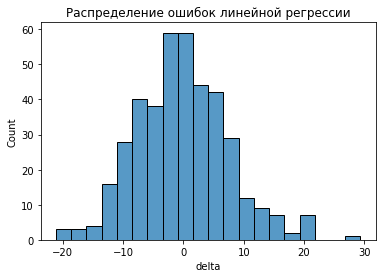

count    403.000000
mean      -0.136480
std        7.626791
min      -21.113367
25%       -5.231205
50%       -0.321489
75%        4.536843
max       29.344203
Name: delta, dtype: float64

In [90]:
errors = pd.DataFrame(y_pred, columns=['y_pred'], index=y_test.index)
errors['y_true'] = y_test
errors['delta'] = errors['y_true'] - errors['y_pred']
errors = errors.drop(columns=['y_true', 'y_pred'])
errors = errors.join(df, how='left')
sns.histplot(errors['delta'])
plt.title('Распределение ошибок линейной регрессии')
plt.show()
errors['delta'].describe()

Визуально распределение похоже на нормальное, но его центр не в нуле. Посмотрим на коэффициенты корреляции ошибки с признаками.

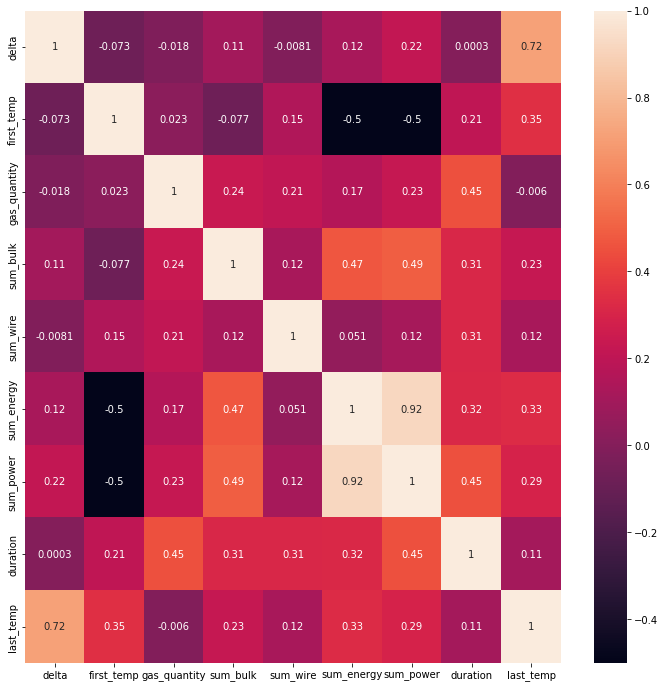

In [91]:
plt.figure(figsize=(12, 12))
sns.heatmap(errors.corr(), annot=True)
plt.show()

Видим заметную корреляцию с итоговой температурой. Посмотрим на зависимость

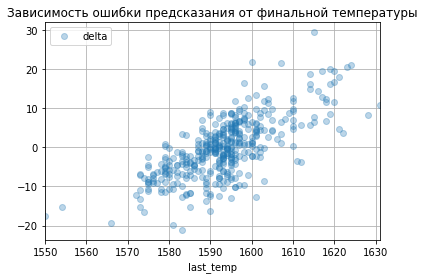

In [92]:
errors.plot(x='last_temp', y='delta', style='o', alpha=0.3, grid=True,
           title='Зависимость ошибки предсказания от финальной температуры')

Видим, что высокие температуры мы недооценивали, а низкие - переоценивали. 

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### Случайный лес

In [93]:
forest_cv = RandomForestRegressor(random_state=42)
cv_results_model_forest = cross_val_score(forest_cv, 
                                            x_train, y_train, 
                                            scoring='neg_mean_absolute_error', cv=5)
display(f'Средний итоговый MAE = {abs(round(cv_results_model_forest.mean(), 2))}')

'Средний итоговый MAE = 6.48'

Хуже, чем линейная регрессия. Попробуем подобрать гиперпараметры.

In [94]:
%%time

params = {'n_estimators': range(10, 250, 30),
          'max_depth': range(5, 15),
         }
forest = RandomForestRegressor(random_state=42)
gs_forest = GridSearchCV(forest, params, scoring='neg_mean_absolute_error')
gs_forest.fit(x_train, y_train)

display(f'Лучший  итоговый MAE = {abs(round(gs_forest.best_score_, 2))}')
display(gs_forest.best_params_)

'Лучший  итоговый MAE = 6.07'

{'max_depth': 10, 'n_estimators': 130}

CPU times: user 1min 57s, sys: 676 ms, total: 1min 58s
Wall time: 2min


In [95]:
forest = RandomForestRegressor(**gs_forest.best_params_, random_state=42)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
test_result = round(mean_absolute_error(y_test, y_pred), 2)

result_df.loc['random_forest', :] = test_result
result_df

,test_mae
median,8.04
regression,5.94
random_forest,6.13


<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

### CatBoost

In [96]:
model_cat = CatBoostRegressor(iterations=1000,
                               eval_metric='MAE',
                               verbose=100, 
                             )

model_cat.fit(x_train, y_train)
y_pred = model_cat.predict(x_test)
test_result = round(mean_absolute_error(y_test, y_pred), 2)

result_df.loc['CatBoost', :] = test_result
result_df

0:	learn: 7.4864704	total: 54.5ms	remaining: 54.4s
100:	learn: 5.6850026	total: 1.49s	remaining: 13.3s
200:	learn: 5.1717167	total: 2.94s	remaining: 11.7s
300:	learn: 4.7897888	total: 4.3s	remaining: 9.99s
400:	learn: 4.4687541	total: 5.75s	remaining: 8.59s
500:	learn: 4.2067165	total: 7.19s	remaining: 7.16s
600:	learn: 3.9449554	total: 8.65s	remaining: 5.74s
700:	learn: 3.7178576	total: 10s	remaining: 4.27s
800:	learn: 3.5331612	total: 11.3s	remaining: 2.8s
900:	learn: 3.3382398	total: 12.8s	remaining: 1.41s
999:	learn: 3.1856452	total: 14.2s	remaining: 0us


,test_mae
median,8.04
regression,5.94
random_forest,6.13
CatBoost,5.94


#### Значимость признаков

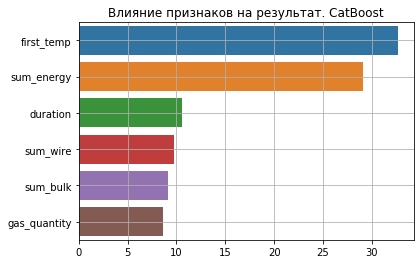

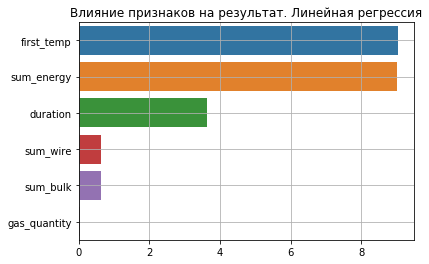

In [97]:
importances = pd.Series(model_cat.feature_importances_, 
                        index=x_train.columns).sort_values(ascending=False)

sns.barplot(y=importances.index, x=importances)
plt.title('Влияние признаков на результат. CatBoost')
plt.grid(True)
plt.show()

importances = pd.Series(coef_table['abs_importance'], 
                        index=coef_table.index).sort_values(ascending=False)

sns.barplot(y=importances.index, x=importances)
plt.title('Влияние признаков на результат. Линейная регрессия')
plt.xlabel('')
plt.grid(True)
plt.show()

Порядок признаков в распределениях значимости одинаковый, но видим, что соотношение разное для разных моделей.

#### Анализ ошибок

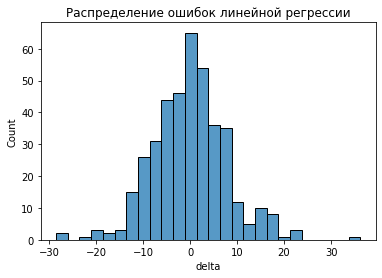

count    403.000000
mean      -0.028794
std        7.916298
min      -28.501618
25%       -4.985351
50%        0.097503
75%        4.359213
max       36.244647
Name: delta, dtype: float64

In [98]:
errors = pd.DataFrame(y_pred, columns=['y_pred'], index=y_test.index)
errors['y_true'] = y_test
errors['delta'] = errors['y_true'] - errors['y_pred']
errors = errors.drop(columns=['y_true', 'y_pred'])
errors = errors.join(df, how='left')
sns.histplot(errors['delta'])
plt.title('Распределение ошибок линейной регрессии')
plt.show()
errors['delta'].describe()

Визуально распределение похоже на нормальное с центром в нуле. Посмотрим на коэффициенты корреляции ошибки с признаками.

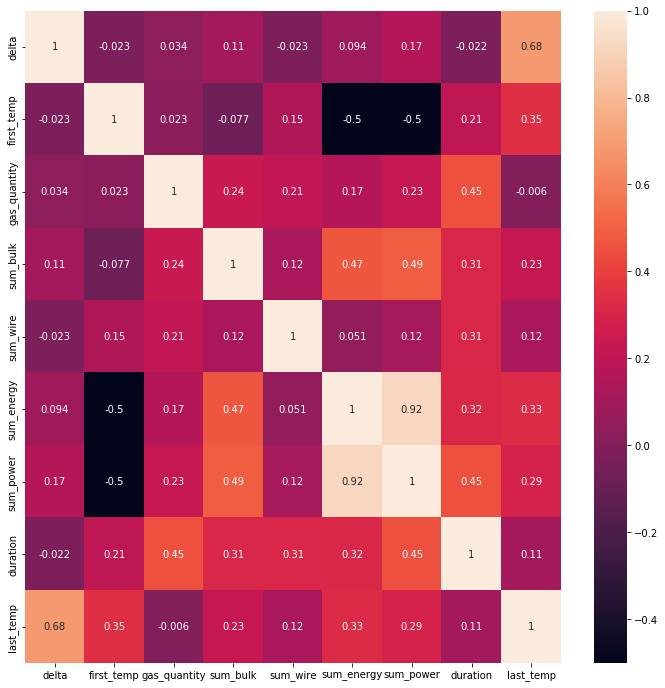

In [99]:
plt.figure(figsize=(12, 12))
sns.heatmap(errors.corr(), annot=True)
plt.show()

Видим заметную корреляцию с итоговой температурой. Посмотрим на зависимость

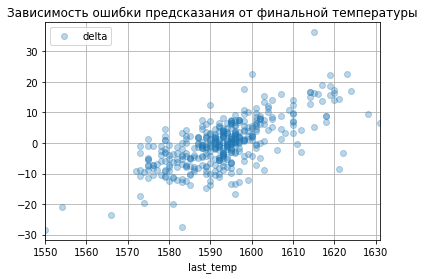

In [100]:
errors.plot(x='last_temp', y='delta', style='o', alpha=0.3, grid=True,
           title='Зависимость ошибки предсказания от финальной температуры')

Видим ситуацию аналогичную линейной регрессии: высокие температуры мы недооценивали, а низкие - переоценивали. 

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>

## Вывод

In [101]:
result_df.sort_values(by='test_mae')

,test_mae
regression,5.94
CatBoost,5.94
random_forest,6.13
median,8.04


Видим, что лучшие результаты показали линейная регрессия и градиентный бустинг. Получилось достичь значения MAE = 5.94.

## Отчет по решению

1. Выполнена большая часть пунктов изначального плана: было сделано все, кроме подбора гиперпараметров для градиентного бустинга, так как даже "из коробоки" он показал высокое качество. Сверх плана была опробована модель случайного леса, которая показала себя хуже других, а также построена константная модель, для того, чтобы иметь ориентир по качеству моделей.
2. Была трудность связанная с некорректным созданием признаков начальная и конечная температура расплава. По низкому значению метрики относительно целевой было понятно, что есть проблема с данными. Проблема была найдена ручной проверкой того, как генерируются признаки. 
3. Ключевые шаги - предобработка данных, подготовка признаков, построение моделей.  
4. Лучшее качество (MAE = 5.94) показали модели линейной регрессии и градиентного бустинга. При этом учитывая сложность моделей, скорость обучения и предсказания, а также интерпретируемость, стоит отдать предпочтение линейной регрессии.
5. Что можно было бы попробовать улучшить:  
    1. Дополнительная настройка градиентного бустинга.
    2. Запросить дополнительную информацию у заказчика по технологическому процессу, это могло бы позволить сохранить часть данных, которые на этапе предобработки были отсеяны как подозрительные.
    3. Учитывая низкий вклад признака, связанного с продувкой газом, можно было бы от него отказаться, мы видели, что качество предсказаний при этом практически не изменяется. Отказ от этого признака позволил бы использовать значения промежуточных температур в учебной выборке для генерации дополнительных данных для обучения, что могло бы повысить качество модели, т.к. количество данных невелико.

<a href="#footer">К содержанию</a>

<footer id="footer"></footer>